Analyse des données

Préparation des données avec pandas


In [52]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import plotly.express as px
import pandas as pd

pd.set_option('display.float_format', lambda x: f'{x :.2f}')
from cleaner import DataCleaner
from get_dataframes import GetDataframes
import hjson

from datetime import datetime

import matplotlib.pyplot as plt
import explo_data_analysis.eda_movies as eda

with open("config.hjson") as fp:
    config = hjson.load(fp)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- On importe la dataframe "title_basics" qui contient les infos pour tout les films de la base de données.
- On enlève tout les films à caractère pornographique de notre liste.
- On nettoie les /N et les transforme en 0.
- On change les types de données des colonnes (float en int, etc...)
- On merge la dataframe "title_basics" avec "tmdb_full" pour obtenir des infos supplémentaires sur chaque film.
- On supprime les colonnes inutiles.
- On supprime les lignes pour lesquelles on a des valeurs manquantes suite au merging.
- On transforme les données dans les colonnes ayant plusieurs valeurs et les on les transforme en listes.
- On importe les dataframes "name_basics", "title_akas" et "title_principals".
- On merge la dataframe "title_akas" avec "tmdb_full".
- On filtre seulement les films qui sont "Released".
- On nettoie "name_basics" comme précédement.
- On merge "name_basics", "title_principals" et on trie les acteurs, directeurs et autres dans un autre dataframe.
- On merge chaque dataframe (acteurs, directeurs, etc...) avec la liste des films qui étaient déjà merged avec tmdb.

In [53]:
datas = GetDataframes(config)
link = "movies"
df = datas.get_dataframes(
    link,
)

2023-10-31 11:29:51 INFO     TSV files already exist.
2023-10-31 11:29:51 INFO     Parquet loaded ! Importing movies...
2023-10-31 11:29:51 INFO     Dataframe movies ready to use!


- On créée une visualisation pour voir la distribution des notes moyennes de chaque film, le nombre de films par décénnie et le total de votes par décénnie.

In [54]:
df["rating_avg"].median()

6.3

In [55]:
eda.show_total_films_decade_plotly(df)

- On peut voir que le nombre de films en dessous des années 1960 est très bas et nous décidons de ne pas les garder.
- Les films ayant moins de 5 en note moyenne ne nous intéressent pas non plus.
- Et les films ayant reçu trop peu de votes sont aussi enlevés.

**Delete les films en dessous de 1960**

In [56]:
condi =(
    (df["titre_date_sortie"] >= 1960) &
    (df["rating_avg"] >= 5)
)
df = df[condi].reset_index(drop='index')

- On peut désormais ré-afficher la distribution des notes moyennes, le total des films par décénnie et le nombre total des votes par décénnies

In [57]:
eda.show_total_films_decade_plotly(df)

- On cherche des informations sur la durée des films en minutes

In [58]:
def boxplot(df: pd.DataFrame):
    fig = px.box(
        data_frame = df,
        # x = "cuts",
        y = "titre_duree",
        # color = "cuts",
        #  ['all', 'outliers', 'suspectedoutliers', False]
        points="outliers",
    )
    fig.update_layout(
        title="Durée des Films",
        # xaxis_title="Décénnie",
        yaxis_title="Durée des Films",
        showlegend=False
        # legend=dict(
        #     yanchor="top",
        #     y=0.99,
        #     xanchor="left",
        #     x=0.01
        # )
    )

    fig.show()

In [59]:
# plt.figure(figsize=(10, 6))
# plt.boxplot(
#     df["titre_duree"],
#     patch_artist=True
# )
# plt.title("Durée des films en minutes")
# plt.tight_layout()
# plt.show()


boxplot(df)

In [60]:
df[(df["titre_duree"] > 210) & (df["titre_duree"] < 400)]

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,original_language,original_title,popularity,production_countries,revenue,spoken_languages,status,region,cuts
846,tt0056172,Lawrence of Arabia,1962,218,"[Adventure, Biography, Drama]",8.30,306556,en,Lawrence of Arabia,23.11,[GB],69995385.00,"[en, ar, tr]",Released,FR,1960-1969
1769,tt0059245,The Greatest Story Ever Told,1965,260,"[Biography, Drama, History]",6.50,11292,en,The Greatest Story Ever Told,12.39,[US],15473333.00,[en],Released,FR,1960-1969
2251,tt0060847,The Ashes,1965,234,"[Drama, History, War]",7.10,444,pl,Popioly,1.23,[PL],0.00,[pl],Released,FR,1960-1969
2732,tt0062663,L'amour fou,1969,252,"[Drama, Romance]",7.40,744,fr,L'Amour fou,1.34,[FR],0.00,[fr],Released,FR,1960-1969
2882,tt0063084,The Hour of the Furnaces,1968,260,"[Documentary, History, War]",7.70,1129,es,La hora de los hornos,1.92,[AR],0.00,"[en, es, pt]",Released,FR,1960-1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34660,tt7200370,Season of the Devil,2018,234,"[Drama, Musical]",7.00,395,tl,Ang Panahon ng Halimaw,1.27,[PH],0.00,[tl],Released,FR,2010-2019
34755,tt7290778,The Wild Frontier,2017,219,[Documentary],6.60,61,fr,L'héroïque lande - La frontière brûle,1.21,[FR],0.00,"[am, ar, en, fa, ti, tr]",Released,FR,2010-2019
35343,tt8020896,An Elephant Sitting Still,2018,230,"[Crime, Drama]",7.80,7626,zh,大象席地而坐,10.39,[CN],0.00,[zh],Released,FR,2010-2019
36487,tt9442842,In Search of Darkness,2019,264,"[Documentary, Horror]",8.00,3621,en,In Search of Darkness,5.50,[US],0.00,[en],Released,FR,2010-2019


In [71]:
df1 = df[df["titre_genres"].apply(lambda x: "Documentary" in x)]

In [74]:
df1.tail(50)

,titre_id,titre_str,titre_date_sortie,titre_duree,titre_genres,rating_avg,rating_votes,original_language,original_title,popularity,production_countries,revenue,spoken_languages,status,region,cuts
36538,tt9576110,J'veux du soleil!,2019,76,[Documentary],6.80,236,fr,J'veux du soleil,2.37,[FR],0.00,[fr],Released,FR,2010-2019
36539,tt9577852,Rolling Thunder Revue,2019,142,"[Biography, Documentary, History]",7.60,7384,en,Rolling Thunder Revue: A Bob Dylan Story by Ma...,10.32,[US],0.00,[en],Released,FR,2010-2019
36544,tt9584906,Berlin Bouncer,2019,87,[Documentary],6.10,392,de,Berlin Bouncer,1.36,[DE],0.00,"[de, en, fr]",Released,FR,2010-2019
36547,tt9591824,Man's First Friend,2018,90,[Documentary],8.20,91,en,Man's First Friend,1.26,[FR],0.00,[en],Released,FR,2010-2019
36548,tt9595610,Land of My Children,2018,88,[Documentary],7.30,8,de,Im Land meiner Kinder,0.88,"[DE, CH]",0.00,"[de, es]",Released,FR,2010-2019
36551,tt9600932,The Brink,2019,91,[Documentary],6.40,852,en,The Brink,2.26,[US],0.00,"[en, it]",Released,FR,2010-2019
36554,tt9602666,Bluebird,2019,83,[Documentary],7.20,195,en,Bluebird,2.63,[US],0.00,[en],Released,FR,2010-2019
36563,tt9617456,For Sama,2019,100,"[Biography, Documentary, War]",8.50,12462,en,For Sama,10.68,"[SY, GB]",0.00,"[ar, en]",Released,FR,2010-2019
36564,tt9617464,Museum Town,2019,76,[Documentary],7.50,30,en,Museum Town,0.60,[US],0.00,[en],Released,FR,2010-2019
36566,tt9619234,Mariner of the Mountains,2021,95,"[Documentary, Romance]",7.20,463,fr,Algerien par accident,2.90,"[DZ, BR, FR, DE]",0.00,"[ar, fr, pt]",Released,FR,>2020


- On constate qu'il y a beaucoup trop de films avec des durées bien trop longues ainsi que des films trop courts qui devraient être considéré plutot comme des court-métrages.
- On enlève donc les films en dessous de 60 minutes et au dessus de 210 minutes (3h30)

In [32]:
condi =(
    (df["titre_duree"] < 60) | (df["titre_duree"] > 210)
)
df = df[~condi].reset_index(drop='index')


# plt.figure(figsize=(10, 6))
# plt.boxplot(
#     df["titre_duree"],
#     patch_artist=True
# )
# plt.ylabel("Durée")
# plt.title("Durée des films en minutes")
# plt.tight_layout()
# plt.show()

boxplot(df)

- On cherche quel genre de films est le plus répandu dans le dataset filtré

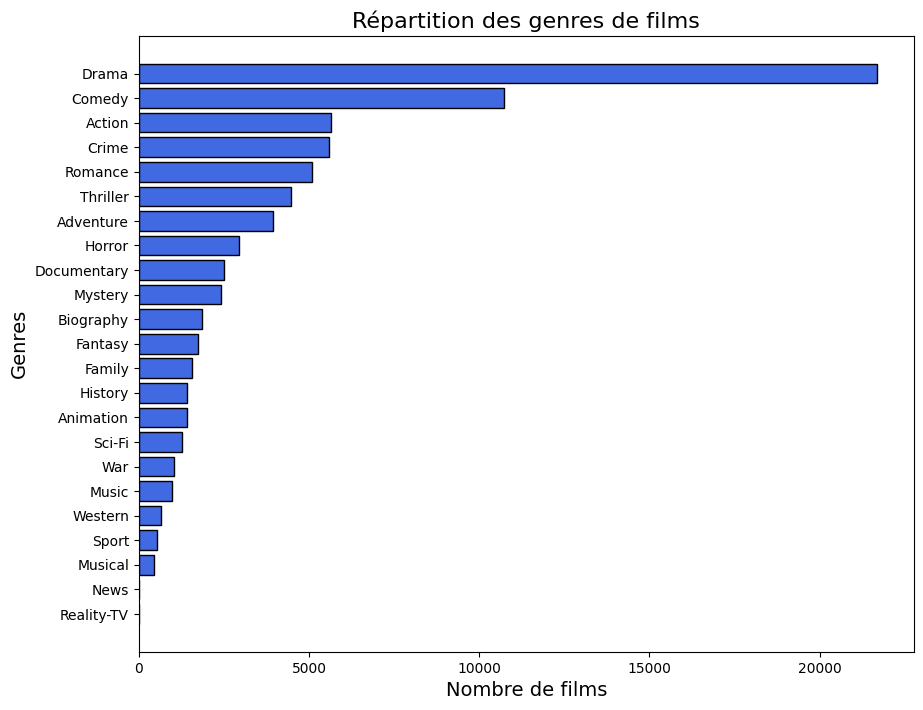

In [9]:
total_genres = df.explode('titre_genres')['titre_genres'].value_counts()

plt.figure(figsize=(10, 8))
plt.barh(
    total_genres.index,
    total_genres.values,
    color='royalblue',
    edgecolor='black'
)
plt.title('Répartition des genres de films', fontsize=16)
plt.xlabel('Nombre de films', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

- On cherche les 10 premiers pays desquels proviennent les films du dataset.

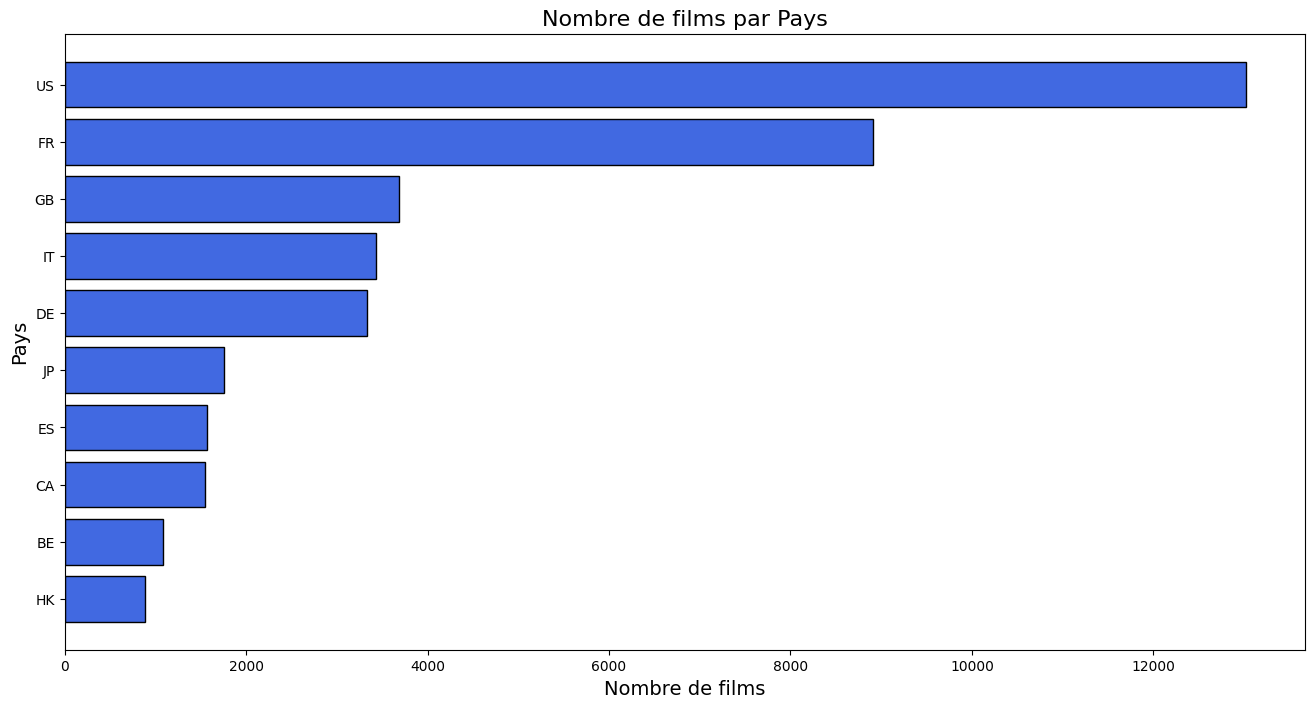

In [10]:
total = df.explode('production_countries')['production_countries'].value_counts()[:10]

plt.figure(figsize=(16, 8))
plt.barh(
    total.index,
    total.values,
    color='royalblue',
    edgecolor='black'
)
plt.title('Nombre de films par Pays', fontsize=16)
plt.xlabel('Nombre de films', fontsize=14)
plt.ylabel('Pays', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

- On cherche si il y a une augmentation ou diminution de la durée des films dans le temps.

In [11]:
boxplotdf = df

boxplotdf["cuts"] = boxplotdf["cuts"].astype(str)
boxplotdf.sort_values("cuts", inplace=True)

fig = px.box(
    data_frame = boxplotdf,
    x = "cuts",
    y = "titre_duree",
    color = "cuts",
    points=False,
)
fig.update_layout(
    title="Durée des Films par Décénnie",
    xaxis_title="Décénnie",
    yaxis_title="Durée des Films",
    showlegend=False
    # legend=dict(
    #     yanchor="top",
    #     y=0.99,
    #     xanchor="left",
    #     x=0.01
    # )
)

fig.show()

- On cherche les 10 films avec le plus de votes sans compter les documentaires, concerts et films d'animations.

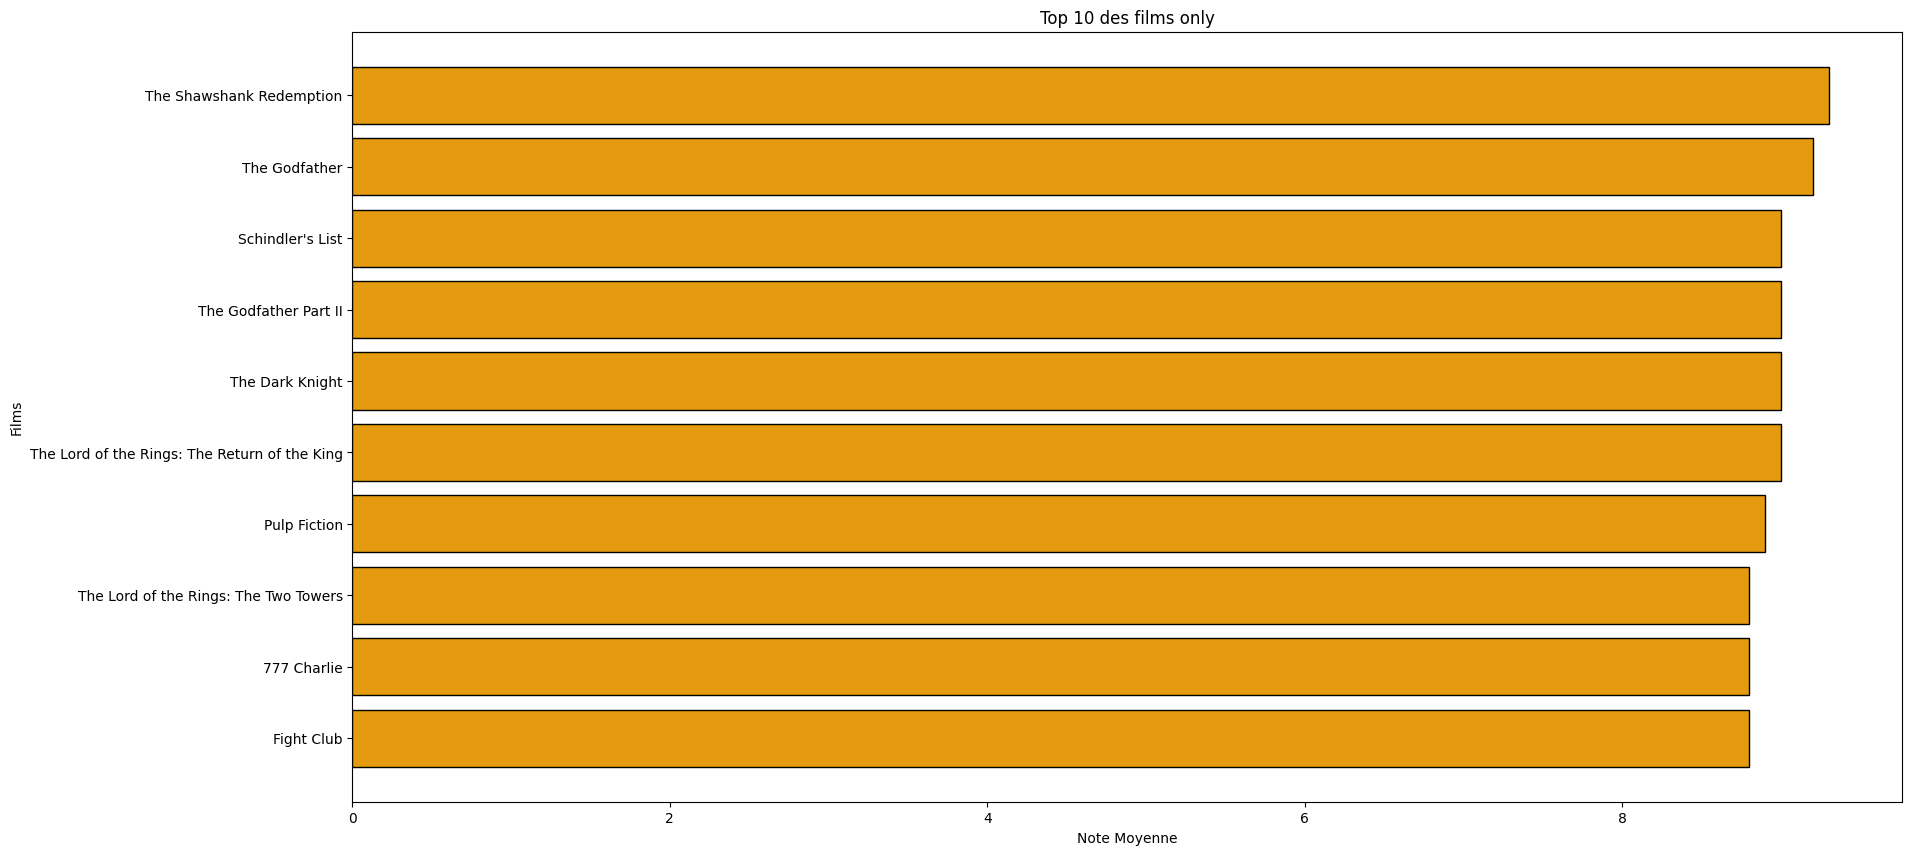

In [12]:
# Je dégage pour les films d'animation les concerts et les docs.
genres_ = ['Animation', 'Music', 'Musical', 'Documentary'] # 'Animation',
df_filtre = df[df['titre_genres'].apply(lambda x: all(g not in x for g in genres_))]
# Je veux uniquement les films ayant eu le plus de vote, je filtre par quantile 0.75 sup only.
df_filtre = df_filtre[df_filtre['rating_votes'] > df_filtre['rating_votes'].quantile(0.75)]

# Groupe les films par la moyenne ratings, ne prend que le top 10
grouped_films = (
    df_filtre.groupby('titre_str')['rating_avg']
    .mean()
    .reset_index()
    .sort_values("rating_avg", ascending=False)
    .head(10)[::-1]
)

plt.figure(figsize=(20, 10))
plt.barh(
    grouped_films['titre_str'],
    grouped_films['rating_avg'],
    color='#e49b0f',
    edgecolor = "black"
)
plt.xlabel('Note Moyenne')
plt.ylabel('Films')
plt.title('Top 10 des films only')
plt.show()


In [13]:
# #  World record of the longest documentary
# # source :https://fr.wikipedia.org/wiki/Ambianc%C3%A9
# longest = actor[actor["titre_duree"] == 43200]
# n = longest[["titre_str", "titre_duree"]].iloc[0]
# heure = n["titre_duree"] // 60
# jours = heure // 24
# print(f"Le film le plus long est {n['titre_str']} d'une durée de {heure} heures soit {jours} jours")
# # All time median for duration
# print(f"All time duration median : {round(actor['titre_duree'].median())} minutes")